In [2]:
import pandas as pd
from plotnine import *

In [3]:
or_reports = pd.read_parquet('./outage_report_individual_reports_2019-20')

In [4]:
filtered_or_reports = or_reports[(or_reports['reason'] != '') & (or_reports['vendor'] != 'overview')].reset_index(drop=True)

In [5]:
instagram_or_reports = filtered_or_reports[filtered_or_reports['vendor'] == 'instagram'].reset_index(drop=True)

In [6]:
github_or_reports = filtered_or_reports[filtered_or_reports['vendor'] == 'github'].reset_index(drop=True)

In [17]:
top4_countries_insta = instagram_or_reports.groupby('country')['vendor'].count().reset_index().sort_values('vendor', ascending=False).reset_index(drop=True).loc[:4, 'country'].values

truncated_insta_reports = instagram_or_reports.copy()
truncated_insta_reports.loc[~truncated_insta_reports['country'].isin(top4_countries_insta), 'country'] = 'Other'

insta_reports_by_country = truncated_insta_reports.groupby('country')['id'].count().reset_index().rename(columns={'id': 'count'})
insta_reports_by_country

,country,count
0,CA,1828
1,GB,1327
2,Other,15938
3,RU,3272
4,UA,3486
5,US,15723


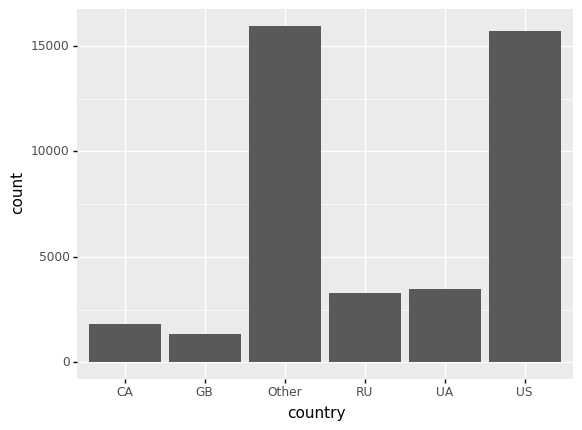

<ggplot: (328058811)>

In [48]:
plt = ggplot(insta_reports_by_country) +\
    geom_bar(aes(x='country', y='count'), stat='identity')

plt

In [14]:
top4_countries_all = filtered_or_reports.groupby('country')['vendor'].count().reset_index().sort_values('vendor', ascending=False).reset_index(drop=True).loc[:4, 'country'].values

truncated_all_reports = filtered_or_reports.copy()
truncated_all_reports.loc[~truncated_all_reports['country'].isin(top4_countries_all), 'country'] = 'Other'

all_reports_by_country = truncated_all_reports.groupby('country')['id'].count().reset_index().rename(columns={'id': 'count'})
all_reports_by_country['country_proper'] = all_reports_by_country['country'].replace(['US', 'GB', 'CA', 'IN', 'RU'], ['USA', 'UK', 'Canada', 'India', 'Russia'])
countries_sorted = all_reports_by_country.sort_values('count')['country_proper'].values
all_reports_by_country['country_cat'] = pd.Categorical(all_reports_by_country['country_proper'], categories=countries_sorted, ordered=True)
all_reports_by_country

,country,count,country_proper,country_cat
0,CA,10265,Canada,Canada
1,GB,12451,UK,UK
2,IN,4478,India,India
3,Other,61927,Other,Other
4,RU,4200,Russia,Russia
5,US,80849,USA,USA


/Users/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 4 x 2 in image.
/Users/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ./plots/reports_by_country.pdf


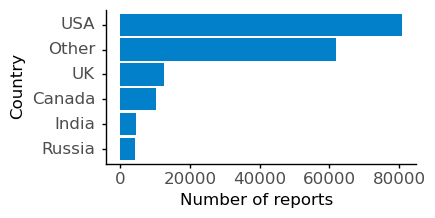

<ggplot: (275238765)>

In [15]:
plt = ggplot(all_reports_by_country) +\
    geom_bar(aes(x='country_cat', y='count'), stat='identity', fill='#0280c9') +\
    coord_flip() +\
    xlab('Country') + ylab('Number of reports') +\
    theme_classic(base_size=12, base_family='sans-serif') +\
    theme(figure_size=(4, 2),
          axis_text_y=element_text(margin={'r': 5}),
          text=element_text(size=12))

plt.save('./plots/reports_by_country.pdf', limitsize=False)
plt

In [11]:
print(len(filtered_or_reports['country'].unique())) # Including unknown
filtered_or_reports['country'].unique()

215


array(['US', 'CZ', 'CA', 'GB', 'DE', 'RU', 'UA', 'AR', 'FR', 'PK', 'KW',
       'PT', 'BH', 'MY', 'RS', 'MT', 'AU', 'NL', 'BE', 'HK', 'MX', 'RO',
       'PL', 'PH', 'SG', 'NG', 'ID', 'SK', 'JM', 'IT', 'KZ', 'SE', 'BR',
       'IE', 'FI', 'NO', 'HR', 'ES', 'CH', 'ZA', 'EG', 'MM', 'PE', 'UG',
       'CL', 'OM', 'TR', 'GR', 'IN', 'HU', 'AT', 'BY', 'SZ', 'NZ', 'IS',
       'BG', 'TW', 'HN', 'EC', 'JP', 'LB', 'BN', 'CN', 'CO', 'LT', 'GH',
       'AL', 'UZ', 'EE', 'DK', 'GY', 'AE', 'MA', 'HT', 'IM', 'BO', 'BZ',
       'PA', 'IL', 'TH', 'KR', 'Unknown', 'DO', 'SA', 'BS', 'MK', 'TT',
       'LV', 'KG', 'PS', 'VE', 'KN', 'NP', 'QA', 'IQ', 'PR', 'PY', 'SI',
       'ZW', 'TN', 'IR', 'DZ', 'KE', 'LK', 'CD', 'BM', 'MU', 'KH', 'GE',
       'CR', 'TZ', 'MZ', 'MQ', 'JE', 'CY', 'MD', 'AW', 'DJ', 'VN', 'SV',
       'SR', 'AZ', 'BB', 'WS', 'SH', 'GG', 'SN', 'BD', 'UY', 'SX', 'JO',
       'NA', 'NE', 'AD', 'TJ', 'BA', 'LU', 'VU', 'AM', 'AO', 'GT', 'GU',
       'NI', 'GM', 'KY', 'GA', 'MO', 'CW', 'SY', 'MG

In [20]:
insta_reports_by_reason = instagram_or_reports.groupby('reason')['id'].count().reset_index().rename(columns={'id': 'count'})
reasons_sorted = insta_reports_by_reason.sort_values('count')['reason'].values
insta_reports_by_reason['reason_cat'] = pd.Categorical(insta_reports_by_reason['reason'], categories=reasons_sorted, ordered=True)
insta_reports_by_reason

,reason,count,reason_cat
0,Can't login,3654,Can't login
1,Can't upload pics,4548,Can't upload pics
2,Everything is down,2613,Everything is down
3,Hashtags not working,408,Hashtags not working
4,Message read problems,1127,Message read problems
5,Message send problems,994,Message send problems
6,Mobile app crashes,3929,Mobile app crashes
7,Mobile app not working,15533,Mobile app not working
8,Newsfeed,4161,Newsfeed
9,Unknown,1708,Unknown


/Users/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 4 x 3 in image.
/Users/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ./plots/insta_reports_by_reason.pdf


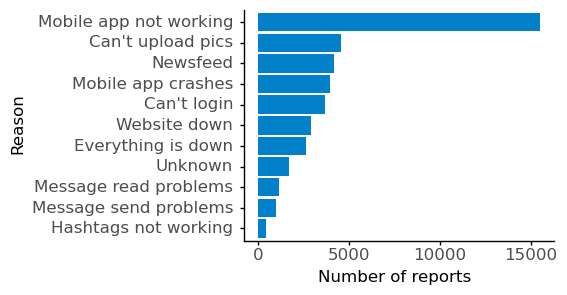

<ggplot: (309548255)>

In [34]:
plt = ggplot(insta_reports_by_reason) +\
    geom_bar(aes(x='reason_cat', y='count'), stat='identity', fill='#0280c9') +\
    coord_flip() +\
    xlab('Reason') + ylab('Number of reports') +\
    theme_classic(base_size=12, base_family='sans-serif') +\
    theme(figure_size=(4, 3),
          axis_text_y=element_text(margin={'r': 5}),
          text=element_text(size=12))

plt.save('./plots/insta_reports_by_reason.pdf', limitsize=False)
plt

In [39]:
reason_fraction_df_list = []

for vendor in filtered_or_reports['vendor'].unique():
    partial_df = filtered_or_reports[filtered_or_reports['vendor'] == vendor].reset_index(drop=True)
    count_df = partial_df.groupby('reason')['id'].count().reset_index().rename(columns={'id': 'count'})
    count_df['pdf'] = count_df['count'] / count_df['count'].sum()
    count_df['vendor'] = vendor
    reason_fraction_df_list.append(count_df)

reason_fraction_df = pd.concat(reason_fraction_df_list)
mean_fractions_reasons = reason_fraction_df.groupby('reason')['pdf'].sum().reset_index().rename(columns={'pdf': 'mean_pdf'})
mean_fractions_reasons['mean_pdf'] = mean_fractions_reasons['mean_pdf'] / 12
top10_mean_fractions_reasons = mean_fractions_reasons.sort_values('mean_pdf', ascending=False).reset_index(drop=True)[:10]
reasons_sorted = top10_mean_fractions_reasons.sort_values('mean_pdf')['reason'].values
top10_mean_fractions_reasons['reason_cat'] = pd.Categorical(top10_mean_fractions_reasons['reason'], categories=reasons_sorted, ordered=True)
top10_mean_fractions_reasons

,reason,mean_pdf,reason_cat
0,Mobile app not working,0.174832,Mobile app not working
1,Website down,0.173807,Website down
2,Unknown,0.130210,Unknown
3,Everything is down,0.127983,Everything is down
4,Can't login,0.082374,Can't login
5,Message send problems,0.075580,Message send problems
6,Message read problems,0.033245,Message read problems
7,Mobile app crashes,0.031515,Mobile app crashes
8,Stream not working,0.029427,Stream not working
9,Videos won't play,0.023544,Videos won't play


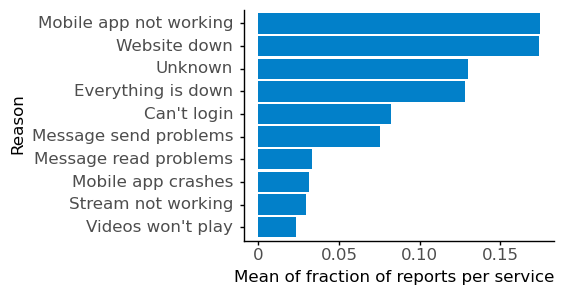

<ggplot: (309449361)>

In [41]:
plt = ggplot(top10_mean_fractions_reasons) +\
    geom_bar(aes(x='reason_cat', y='mean_pdf'), stat='identity', fill='#0280c9') +\
    coord_flip() +\
    xlab('Reason') + ylab('Mean of fraction of reports per service') +\
    theme_classic(base_size=12, base_family='sans-serif') +\
    theme(figure_size=(4, 3),
          axis_text_y=element_text(margin={'r': 5}),
          text=element_text(size=12))

plt.save('./plots/all_reports_by_reason.pdf', limitsize=False)
plt

In [64]:
github_or_reports.groupby('reason')['id'].count().reset_index().rename(columns={'id': 'count'})['count'].sum()

1062

In [65]:
filtered_or_reports.groupby('vendor')['country'].count().reset_index().rename(columns={'country':'count'}).sort_values('count')

,vendor,count
3,github,1062
7,skype,2029
0,apple-servers,2566
2,facebook-messenger,6836
8,snapchat,8118
10,whatsapp,9426
4,gmail,9427
6,netflix,20211
9,twitter,20252
1,facebook,25886
